## Integrantes:
- Luis Francisco Rodriguez Acevedo

- Realizar un programa que cree una foto
panorámica partir de dos imágenes
- Mostrar las mejores coincidencias
- Usar características ORB
- Hacer uso de las funciones de CV:
  - warpPerspective
  - findHomograph
  - drawMatchesKnn

## Ejemplo

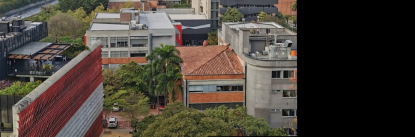

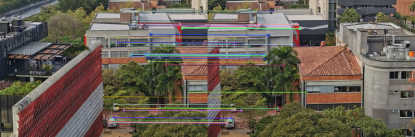

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def create_panorama(img1, img2):
    # Inicializar el detector ORB
    orb = cv2.ORB_create()

    # Encontrar los puntos clave y sus descriptores para ambas imágenes
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inicializar el objeto de coincidencia de fuerza bruta
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Realizar la coincidencia de los descriptores
    matches = bf.match(descriptors1, descriptors2)

    # Ordenar las coincidencias por distancia
    matches = sorted(matches, key=lambda x: x.distance)

    # Elegir solo las mejores coincidencias
    good_matches = matches[:100]  # Puedes ajustar este número según tus necesidades

    # Dibujar los emparejamientos en una nueva imagen
    matching_result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Convertir los puntos clave en formato numpy array
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Calcular la matriz de homografía
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Deformar la segunda imagen para alinearla con la primera
    img2_aligned = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))

    # Superponer las imágenes
    img2_aligned[0:img1.shape[0], 0:img1.shape[1]] = img1

    return img2_aligned, matching_result

# Cargar las imágenes
img1 = cv2.imread('/content/Imagen2.jpg')
img2 = cv2.imread('/content/Imagen1.jpg')

# Crear la foto panorámica y obtener los emparejamientos dibujados
panorama, matching_result = create_panorama(img1, img2)

scale_percent = 30  # Puedes ajustar este valor según tus necesidades
width_panorama = int(panorama.shape[1] * scale_percent / 100)
height_panorama = int(panorama.shape[0] * scale_percent / 100)
dim_panorama = (width_panorama, height_panorama)

width_matching_result = int(matching_result.shape[1] * scale_percent / 100)
height_matching_result = int(matching_result.shape[0] * scale_percent / 100)
dim_matching_result = (width_matching_result, height_matching_result)

# Redimensionar las imágenes
panorama_resized = cv2.resize(panorama, dim_panorama, interpolation=cv2.INTER_AREA)
matching_result_resized = cv2.resize(matching_result, dim_matching_result, interpolation=cv2.INTER_AREA)

# Mostrar la foto panorámica y los emparejamientos redimensionados
cv2_imshow(panorama_resized)
cv2_imshow(matching_result_resized)


## Propio

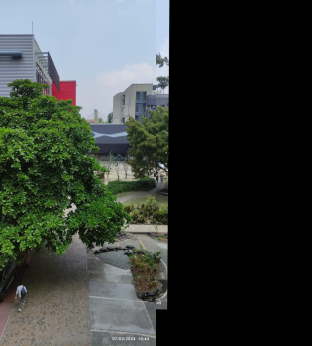

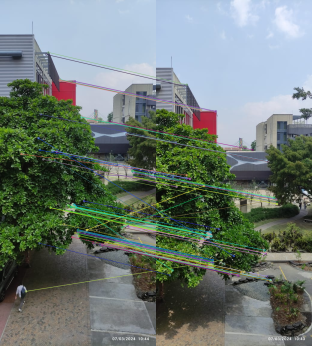

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def create_panorama(img1, img2):
    # Inicializar el detector ORB
    orb = cv2.ORB_create()

    # Encontrar los puntos clave y sus descriptores para ambas imágenes
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inicializar el objeto de coincidencia de fuerza bruta
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Realizar la coincidencia de los descriptores
    matches = bf.match(descriptors1, descriptors2)

    # Ordenar las coincidencias por distancia
    matches = sorted(matches, key=lambda x: x.distance)

    # Elegir solo las mejores coincidencias
    good_matches = matches[:100]  # Puedes ajustar este número según tus necesidades

    # Dibujar los emparejamientos en una nueva imagen
    matching_result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Convertir los puntos clave en formato numpy array
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Calcular la matriz de homografía
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Deformar la segunda imagen para alinearla con la primera
    img2_aligned = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))

    # Superponer las imágenes
    img2_aligned[0:img1.shape[0], 0:img1.shape[1]] = img1

    return img2_aligned, matching_result

# Cargar las imágenes
img1 = cv2.imread('/content/IMG-20240307-WA0004.jpg')
img2 = cv2.imread('/content/IMG-20240307-WA0005.jpg')

# Crear la foto panorámica y obtener los emparejamientos dibujados
panorama, matching_result = create_panorama(img1, img2)

scale_percent = 30  # Puedes ajustar este valor según tus necesidades
width_panorama = int(panorama.shape[1] * scale_percent / 100)
height_panorama = int(panorama.shape[0] * scale_percent / 100)
dim_panorama = (width_panorama, height_panorama)

width_matching_result = int(matching_result.shape[1] * scale_percent / 100)
height_matching_result = int(matching_result.shape[0] * scale_percent / 100)
dim_matching_result = (width_matching_result, height_matching_result)

# Redimensionar las imágenes
panorama_resized = cv2.resize(panorama, dim_panorama, interpolation=cv2.INTER_AREA)
matching_result_resized = cv2.resize(matching_result, dim_matching_result, interpolation=cv2.INTER_AREA)

# Mostrar la foto panorámica y los emparejamientos redimensionados
cv2_imshow(panorama_resized)
cv2_imshow(matching_result_resized)
